## Importing libraries

In [1]:
import requests
import pandas as pd
import pandas_datareader.data as web
import datetime
from datetime import datetime
import numpy as np
import APIs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
%config InlineBackend.figure_format='retina'
fred_key = APIs.fred_api

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

Defining function to get fred data: fredData

In [3]:
def fredData(request_dict, start_date, end_date, api_key, freq = 'Q'):
    """ download some data from fred """
    import pandas as pd
    import numpy as np
    import requests
    base = 'https://api.stlouisfed.org/fred/series/observations?series_id='
    dates = '&observation_start={}&observation_end={}'.format(start_date, end_date)
    api_key = '&api_key={}'.format(api_key)
    ftype = '&file_type=json'
    
    dataFrame = pd.DataFrame()
    for code, name in request_dict.items():
        url = '{}{}{}{}{}'.format(base, code, dates, api_key, ftype)
        r = requests.get(url).json()['observations']
        dataFrame[name[0]] = [i['value'] for i in r]

    dataFrame = dataFrame.replace('.', np.nan)    
    dataFrame = dataFrame.astype(float)

    sectors = pd.MultiIndex.from_tuples(list(zip([i[1] 
                                                  for i in request_dict.values()],[i[0] 
                                                                                   for i in request_dict.values()])))
    dataFrame.columns = sectors

    dates = pd.date_range(start_date, periods=dataFrame.shape[0], freq=freq)
    dataFrame.index = dates
    return dataFrame

"""
# usage 
df = fredData(request_dict=q_dict, start_date=start_date, end_date=end_date, api_key=fred_key)
df
"""

'\n# usage \ndf = fredData(request_dict=q_dict, start_date=start_date, end_date=end_date, api_key=fred_key)\ndf\n'

## Quarterly data

In [4]:
start = '1979-12-31'
end = '2015-01-01'

q_dict = {
    'TABSHNO': ['Total Assets', 'Asset'],
    'TTABSHNO': ['Total Non-Financial Assets', 'Asset'],
    'CDGABSHNO': ['Durable Goods', 'Asset', 'Current Cost Basis'],
    'HNOREMV': ['Real Estate Market Value', 'Asset'],
    'TFAABSHNO': ['Total Financial Assets', 'Asset'],
    'TSDABSHNO' : ['Savings Deposits', 'Asset'],
    'TSABSHNO' : ['Treasury Securities', 'Asset', 'Including U.S. Savings Bonds', '(DISCONTINUED)'],
    #'OTABSHNO' : ['Treasury Securities', 'Asset', 'Excluding U.S. Savings Bonds', '(DISCONTINUED)'],
    'MMFSABSHNO' : ['Money Market Mutual Fund Shares', 'Asset'],
    'HNOCEA' : ['Corporate Equities', 'Asset'],
    'MMFSABSHNO' : ['Money Market Mutual Fund Shares', 'Asset'],
    'NOCCSLA' : ['Student Loans', 'Asset', 'Consumer Credit'],
    'SCABSHNO' : ['Security Credit', 'Asset'],
    'CMIABSHNO' : ['Credit Market Instruments', 'Asset'],
    'MABSHNO' : ['Mortgages', 'Asset'],
    'LIRABSHNO' : ['Life Insurance Reserves', 'Asset'],
    'MAABSHNO' : ['Total Miscellaneous Assets', 'Asset'],
    'TLBSHNO': ['Total Liabilities', 'Liability'],
    'CCLBSHNO': ['Consumer Credit', 'Liability'],
    'HMLBSHNO': ['Home Mortgages', 'Liability'],
    'CMLBSHNO': ['Commercial Mortgages', 'Liability'],
    'OLALBSHNO': ['Other Loans and Advances', 'Liability'],
    'TNWBSHNO': ['Total Net Worth', 'Net Worth'],
    'HNONWPDPI': ['% Disposable Personal Income', 'Net Worth'],
    'HNODPI': ['Disposable Personal Income', 'Income and Consumption'],
    #'RCVSRNWBSHNO': ['Residential Structures', 'Income and Consumption', 'Current Cost Basis'],
    #'NOREMV': ['Nonprofit Organizations', 'Real Estate Market Value'],
    #'OEHRENWBSHNO': ["Households Owners' Equity", 'Real Estate Market Value'],
}
quarterly = fredData(request_dict=q_dict, start_date=start, end_date=end, api_key=fred_key, freq='Q')

In [5]:
quarterly.tail()

Asset                                           \
           Total Assets Total Non-Financial Assets Durable Goods   
2014-03-31    96625.286                  27184.098      4784.529   
2014-06-30    98113.665                  27439.901      4810.601   
2014-09-30    98592.157                  27836.688      4843.384   
2014-12-31   100541.996                  28302.747      4860.528   
2015-03-31   102234.245                  28773.068      4882.298   

                                                                             \
           Real Estate Market Value Total Financial Assets Savings Deposits   
2014-03-31                21893.895              69441.188         7596.293   
2014-06-30                22117.492              70673.764         7643.334   
2014-09-30                22475.151              70755.469         7728.025   
2014-12-31                22917.716              72239.249         7895.399   
2015-03-31                23357.182              73461.177         8133.690   

                                                                \
           Treasury Securities Money Market Mutual Fund Shares   
2014-03-31              900.44                        1520.524   
2014-06-30              721.07                        1464.782   
2014-09-30              704.85                        1481.525   
2014-12-31              696.74                        1568.339   
2015-03-31              640.17                        1503.192   

                                                       ...              \
           Corporate Equities Student Loans            ...               
2014-03-31          12837.129        50.643            ...               
2014-06-30          13548.812        49.483            ...               
2014-09-30          13238.261        47.536            ...               
2014-12-31          13814.361        47.595            ...               
2015-03-31          14149.960        46.836            ...               

                                                               \
           Life Insurance Reserves Total Miscellaneous Assets   
2014-03-31                1420.733                   1027.623   
2014-06-30                1440.014                   1036.155   
2014-09-30                1450.050                   1038.335   
2014-12-31                1472.054                   1042.789   
2015-03-31                1492.391                   1045.376   

                   Liability                                 \
           Total Liabilities Consumer Credit Home Mortgages   
2014-03-31         14017.445        3100.078       9448.785   
2014-06-30         14151.978        3167.475       9442.214   
2014-09-30         14261.462        3246.127       9452.486   
2014-12-31         14336.467        3314.567       9464.474   
2015-03-31         14313.545        3319.710       9434.663   

                                                               Net Worth  \
           Commercial Mortgages Other Loans and Advances Total Net Worth   
2014-03-31              223.336                  461.899       82607.841   
2014-06-30              225.006                  518.309       83961.686   
2014-09-30              226.676                  533.563       84330.695   
2014-12-31              228.346                  513.970       86205.529   
2015-03-31              230.950                  499.229       87920.700   

                                            Income and Consumption  
           % Disposable Personal Income Disposable Personal Income  
2014-03-31                     639.7813                  12911.888  
2014-06-30                     639.3901                  13131.528  
2014-09-30                     633.2873                  13316.341  
2014-12-31                     640.1817                  13465.790  
2015-03-31                     647.8461                  13571.233  

[5 rows x 23 columns]

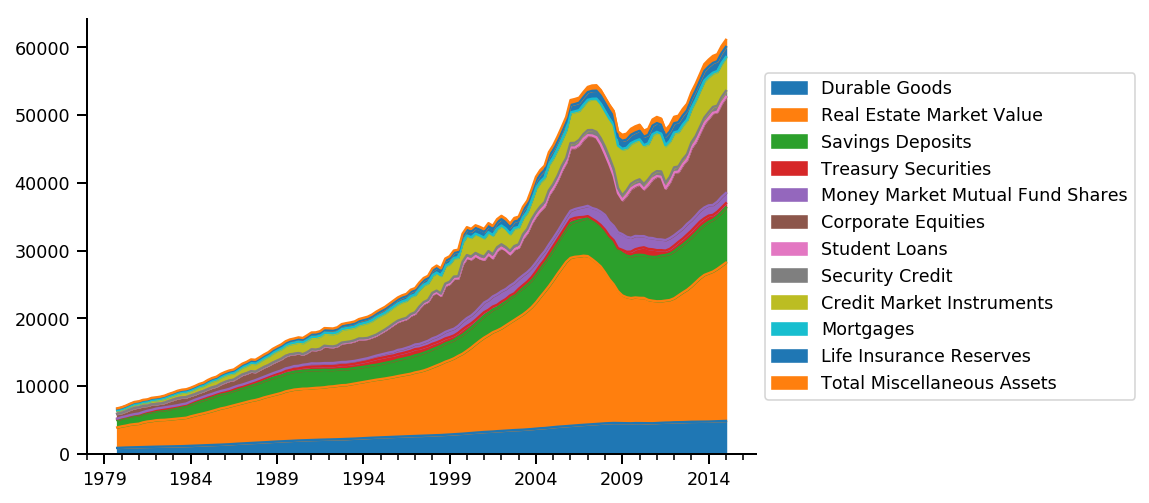

In [6]:
quarterly['Asset'].drop(['Total Assets', 'Total Financial Assets', 'Total Non-Financial Assets'], axis=1).plot.area()
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

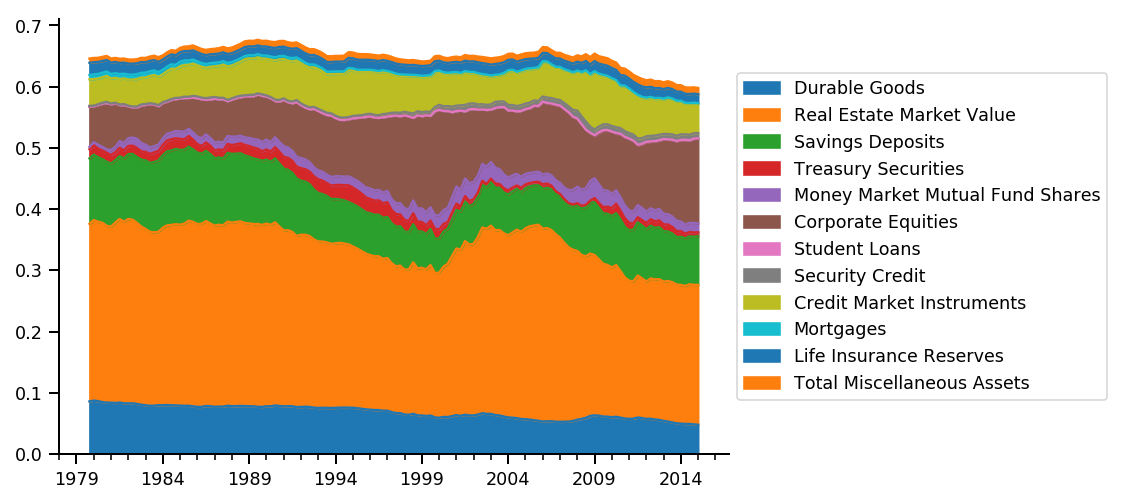

In [7]:
quarterly['Asset'].drop(['Total Assets', 'Total Financial Assets', 'Total Non-Financial Assets'], axis=1).divide(quarterly['Asset','Total Assets'], axis=0).plot.area()
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

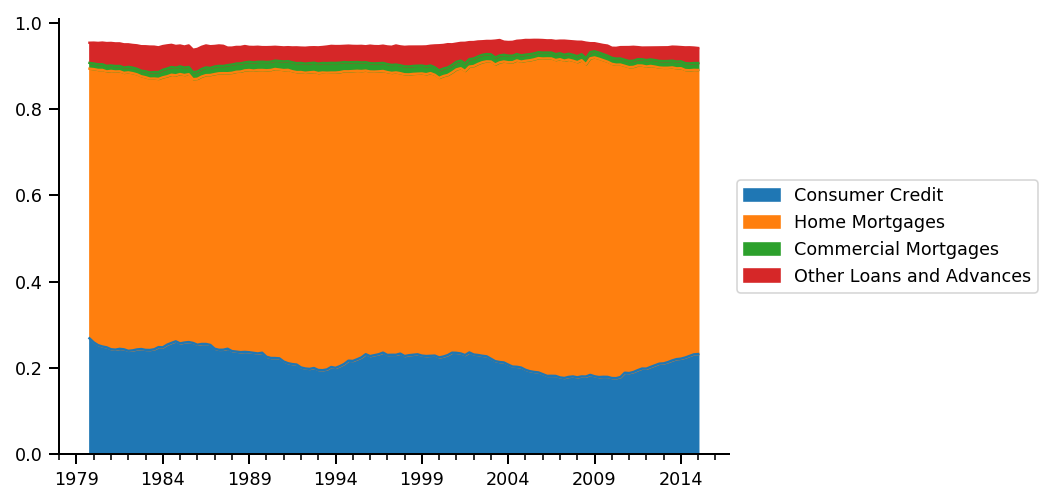

In [8]:
quarterly['Liability'].drop('Total Liabilities', axis=1).divide(quarterly['Liability','Total Liabilities'], axis=0).plot.area()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

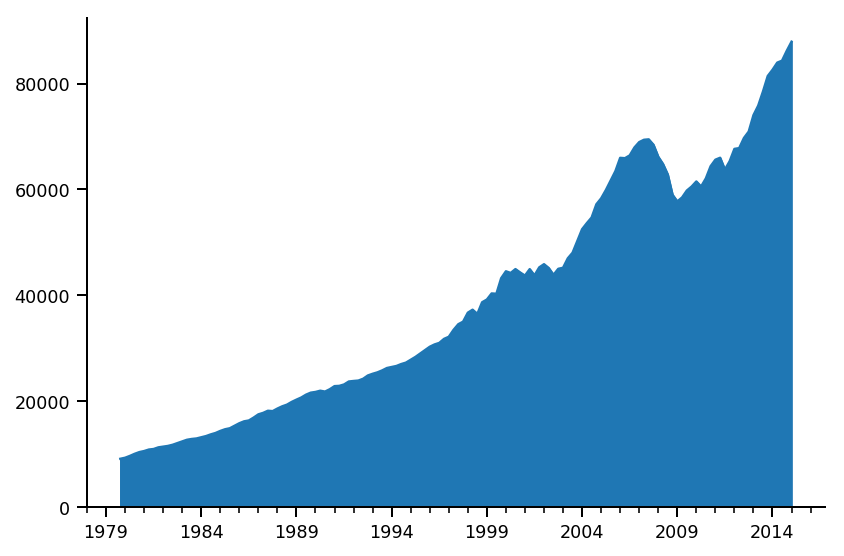

In [9]:
quarterly['Net Worth', 'Total Net Worth'].plot.area()
sns.despine()
plt.tight_layout()
plt.show()

# As a percentage of disposable personal income (SAAR)

In [27]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2015, 1, 1)

In [48]:
DPIdf = web.DataReader(['DPI', 'CDSP'], 'fred', start, end, access_key=fred_key)
DPIdf.columns = [
    'Disposable Personal Income (DPI)',
    'Consumer Debt Service Payments',
]

In [49]:
DPIdf.head()

Disposable Personal Income (DPI)  Consumer Debt Service Payments
DATE                                                                        
1980-01-01                          1947.118                        6.240027
1980-04-01                          1977.275                        6.151972
1980-07-01                          2046.297                        5.913000
1980-10-01                          2125.848                        5.740706
1981-01-01                          2177.992                        5.691433

In [20]:
start = '1980-01-01'
end = '2015-01-01'

SAAR_dict = {
    'DPI': ['Disposable Personal Income (DPI)', 'Disposable Personal Income'],
    #'HNONWPDP' : ['Net Worth (% DPI)', 'Net Worth'],
    'CDSP': ['Consumer Debt Service Payments', 'Liability']
}

DPI = fredData(request_dict=SAAR_dict, start_date=start, end_date=end, api_key=fred_key, freq='Q')

In [21]:
DPI.tail()

Disposable Personal Income                      Liability
           Disposable Personal Income (DPI) Consumer Debt Service Payments
2014-03-31                        12911.888                       5.209544
2014-06-30                        13131.529                       5.232607
2014-09-30                        13316.341                       5.262815
2014-12-31                        13465.790                       5.307268
2015-03-31                        13571.233                       5.370838

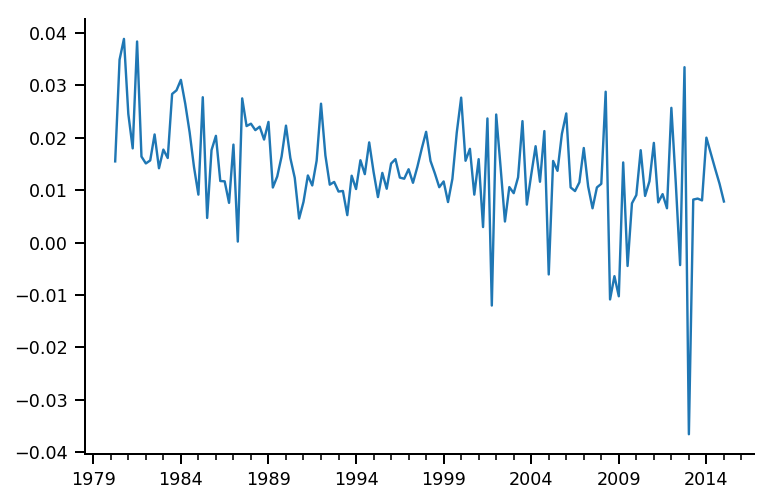

In [25]:
DPI['Disposable Personal Income', 'Disposable Personal Income (DPI)'].pct_change().plot()
sns.despine()
plt.show()

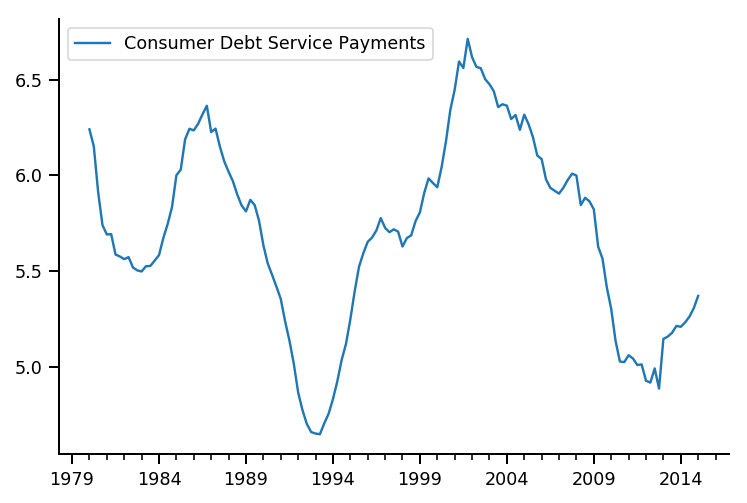

In [24]:
DPI['Liability'].plot()
sns.despine()
plt.show()

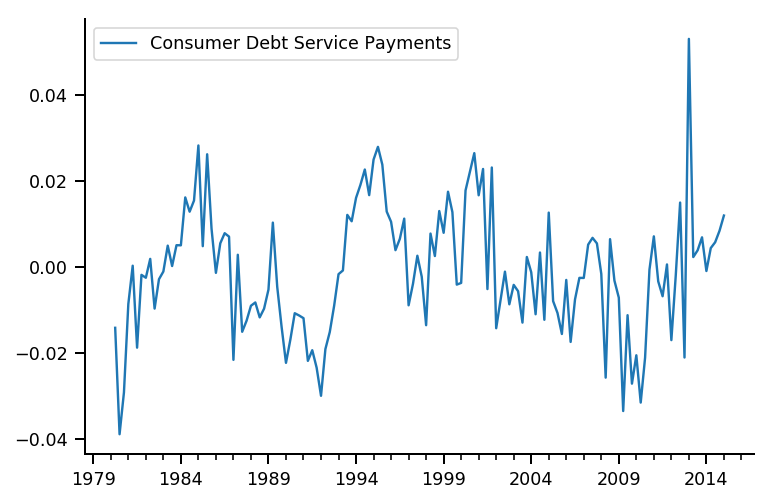

In [26]:
DPI['Liability'].pct_change().plot()
sns.despine()
plt.show()

In [40]:
DPIdf

DPI      CDSP
DATE                           
1980-01-01   1947.118  6.240027
1980-04-01   1977.275  6.151972
1980-07-01   2046.297  5.913000
1980-10-01   2125.848  5.740706
1981-01-01   2177.992  5.691433
1981-04-01   2217.133  5.693254
1981-07-01   2302.221  5.586641
1981-10-01   2339.999  5.576550
1982-01-01   2375.323  5.562731
1982-04-01   2412.547  5.573340
1982-07-01   2462.319  5.519579
1982-10-01   2497.228  5.504033
1983-01-01   2541.526  5.498346
1983-04-01   2582.521  5.525737
1983-07-01   2655.754  5.527094
1983-10-01   2732.912  5.555206
1984-01-01   2817.775  5.583316
1984-04-01   2892.421  5.673696
1984-07-01   2953.265  5.746739
1984-10-01   2995.748  5.835576
1985-01-01   3023.121  6.000506
1985-04-01   3106.975  6.029668
1985-07-01   3121.548  6.187760
1985-10-01   3176.623  6.243071
1986-01-01   3241.309  6.234700
1986-04-01   3279.358  6.269203
1986-07-01   3317.667  6.318545
1986-10-01   3342.776  6.363267
1987-01-01   3405.257  6.226087
1987-04-01   3405.848  6.243911
...               ...       ...
2007-10-01  10660.759  6.008739
2008-01-01  10780.170  5.999200
2008-04-01  11090.513  5.845067
2008-07-01  10969.952  5.883005
2008-10-01  10899.444  5.864502
2009-01-01  10787.538  5.822820
2009-04-01  10952.436  5.628029
2009-07-01  10903.353  5.565118
2009-10-01  10984.918  5.414358
2010-01-01  11084.387  5.303386
2010-04-01  11279.729  5.136389
2010-07-01  11380.056  5.028270
2010-10-01  11513.141  5.025281
2011-01-01  11732.112  5.061180
2011-04-01  11821.927  5.044381
2011-07-01  11931.147  5.010215
2011-10-01  12009.159  5.013297
2012-01-01  12317.916  4.928206
2012-04-01  12459.684  4.918364
2012-07-01  12405.968  4.992118
2012-10-01  12821.214  4.887206
2013-01-01  12351.870  5.146390
2013-04-01  12453.127  5.158375
2013-07-01  12557.547  5.178504
2013-10-01  12658.500  5.214294
2014-01-01  12911.888  5.209544
2014-04-01  13131.529  5.232607
2014-07-01  13316.341  5.262815
2014-10-01  13465.790  5.307268
2015-01-01  13571.233  5.370838

[141 rows x 2 columns]